In [1]:
%reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
from scipy.stats import norm
import statsmodels.api as sm

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


# 2 Sample t-test for testing for the differences in means: Independent t-test

It is known that smoking is associated with chronic obstructive pulmaonary disease.  Research has shown that this process is linked with a number of inflammatory signatures in exhaled breath condensate (EBC), one of which is nitrite concentration. Average nitrate EBC concentration was collected from eleven nonsmokers and nine smokers.   

Determine whether there is a significant difference in the mean nitrite EBC concentration between smokers and non-smokers, using a confidence level of 95%. 

Load and explore the data

In [2]:
Nonsmokers=pd.Series([15723, 18990, 7597, 24160, 12044, 17636, 19792, 24945, 21372, 19271, 22804],name="NonSmokers")
Smokers=pd.Series([24960, 31210, 28234, 17786, 30612, 25944, 19437, 16945, 23434],name="Smokers")

In [3]:
# create a pandas dataframe of the name of df; axis=1 is for columns
df=pd.concat([Nonsmokers,Smokers],axis='columns')
df

,NonSmokers,Smokers
0,15723,24960.0
1,18990,31210.0
2,7597,28234.0
3,24160,17786.0
4,12044,30612.0
5,17636,25944.0
6,19792,19437.0
7,24945,16945.0
8,21372,23434.0
9,19271,NaN


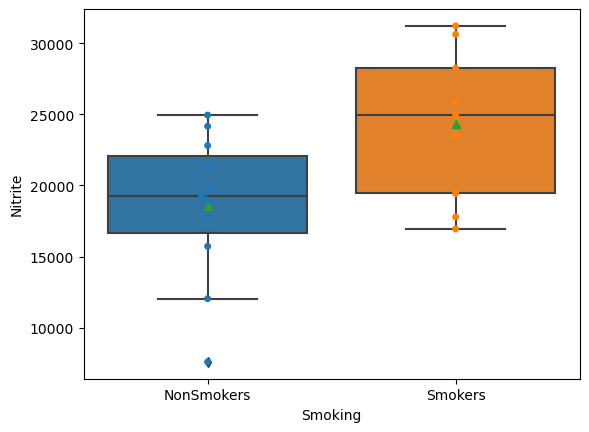

In [4]:
# Plot the data to visualize
ax=sns.boxplot(data=df,showmeans=True)
ax.set(xlabel="Smoking")
ax.set(ylabel="Nitrite")
ax=sns.swarmplot(data=df)

In [5]:
Nonsmokers.describe()

count       11.000000
mean     18575.818182
std       5213.449603
min       7597.000000
25%      16679.500000
50%      19271.000000
75%      22088.000000
max      24945.000000
Name: NonSmokers, dtype: float64

In [6]:
Smokers.describe()

count        9.000000
mean     24284.666667
std       5328.331892
min      16945.000000
25%      19437.000000
50%      24960.000000
75%      28234.000000
max      31210.000000
Name: Smokers, dtype: float64

In [7]:
df.describe()

,NonSmokers,Smokers
count,11.000000,9.000000
mean,18575.818182,24284.666667
std,5213.449603,5328.331892
min,7597.000000,16945.000000
25%,16679.500000,19437.000000
50%,19271.000000,24960.000000
75%,22088.000000,28234.000000
max,24945.000000,31210.000000


By default numpy uses a maximum likelihood estimate for the standard deviation (degrees of freedom (DF) = n so ddof=0), so to have it do the unbiased estimation we set the ddof = 1. Note that this is different than what pandas does. By default pandas uses ddof=1.

In [8]:
# standard deviation of the sample use ddof n-1
stdNonsmokers=np.std(Nonsmokers,ddof=1)
stdSmokers=np.std(Smokers,ddof=1)
print(stdNonsmokers)
print(stdSmokers)

5213.449603059031
5328.331891877608


# - Review assumptions of the chosen statistics test

First review assumptions of 2 sample t-tests:  independence of sample (no trends within sample) and between samples (sample A does not affect sample B), normality, and equal variance.

Samples are independent from each other (not linked or paired).

Let's look at the assumption of normality next.  First we will run a a Shapiro-Wilk test to test if the sample data is well-modelled by a normal distribution and to compute how likely it is for a random variable underlying the data set to be  normally distributed.  

Remember that this tests the null hypothesis that the sample is normally disributed.  Larger than 0.05 p-value means we fail to reject the null hypothesis (that the distribution of the sample is sig different from a normal distribution) and conclude that the sample is not significnatly different from a normal distribution.

In [9]:
stats.shapiro(Nonsmokers)

ShapiroResult(statistic=0.9328737854957581, pvalue=0.44065162539482117)

In [10]:
stats.shapiro(Smokers)

ShapiroResult(statistic=0.930608868598938, pvalue=0.4871654212474823)

We have shown that the two samples are normally distributed. 

Now let's look at the assumption of equal variance (homogeneity of variance or homoscedasticity).  We want to assume that the varianes of the populations from which the different samples are drawn are equal.  We will look at the Levene's test, that tests the hypothesis that the population variances are equal.  The Levene test is pretty conservative, and you can use center='mean', 'median', or 'trimmed' to test with, with median being the most conservative and the dafault in SciPy.  If the resulting p-value is less than the chosen significnace level, the null hypothesis can be rejected and you conclude that there is a differnece between the variances.  Larger than 0.05 p-value measn we fail to reject the null hypthesis and conclude that we think that the variances are the same.  

try: stats.levene(Nonsmokers,Smokers,center='median')

In [11]:
stats.levene(Nonsmokers,Smokers,center='median')

LeveneResult(statistic=0.13178107984421228, pvalue=0.7208204036312478)

We have looked at tests for normality and equal variance.  Let's also look at these assumptions visually using qq plots.  Remember that using qq plots are the best way and most accepted way to judge the assumptions of these tests, but the determiniations are subjective and take some getting use to.    

Let's look at normality via qq plots and plot this data on a qq plot. This method to plot the qq plots also takes loc (mean=location) and scale (std=scale) as the values. We'll use the ones calculated from our data set because in actuality we don't know the true population parameters. The additional parameter line='45' plots the y=x line on the same plot.

Remember to sort your data for a qqplot

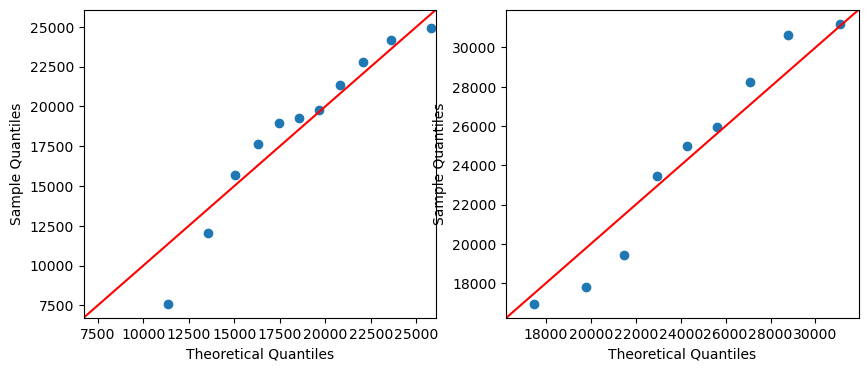

In [12]:
Nonsmokers.sort_values()
Smokers.sort_values()
fig2,ax2=plt.subplots(nrows=1,ncols=2,figsize=(10,4))
sm.qqplot(Nonsmokers,line='45',loc=np.mean(Nonsmokers),scale=stdNonsmokers,ax=ax2[0])
sm.qqplot(Smokers,line='45',loc=np.mean(Smokers),scale=stdSmokers,ax=ax2[1])
plt.show()

# - Formulate the null and alternative hypothesis 

Is it a one-sided test or a two-sided test?

two sided

Null hypthesis= $\mu1$=$\mu2$ \
Alternative hypothesis = $\mu1$ $\neq$ $\mu2$

# - Choose a significance level to work to

alpha = $\alpha$ = 0.05

# - Calculate the test statistic from the data

The t statistic to test whether the means are different can be calculated as follows: \
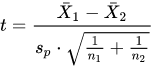

Let's look at the calculations. \
n − 1 is the number of degrees of freedom for each group, and the total sample size minus two (that is, n1 + n2 − 2) is the total number of degrees of freedom, which is used in significance testing.

18 dof, n1+n2-2 = 11+9-2=18

In [13]:
nA=len(Nonsmokers)
nB=len(Smokers)
print("The number of observations in the samples are: " + str(nA)+" and " +str(nB))
print("The standard deviation of the sampes are: "+ str(stdNonsmokers)+" and "+ str(stdSmokers))
print("The mean of the samples are: "+ str(np.mean(Nonsmokers)) +" and "+str(np.mean(Smokers)))
print("The variance of the samples are: "+str(stdNonsmokers**2)+" and "+ str(stdSmokers**2))
print("The degrees of freedom are: "+ str(len(Nonsmokers)+len(Smokers)-2))

The number of observations in the samples are: 11 and 9
The standard deviation of the sampes are: 5213.449603059031 and 5328.331891877608
The mean of the samples are: 18575.81818181818 and 24284.666666666668
The variance of the samples are: 27180056.763636366 and 28391120.750000004
The degrees of freedom are: 18


We will calculate a pooled estimate of the combined standard deviations, which is a weighted average of the two standard deviations, used when the variances are equivalent to each other \
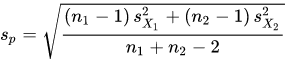

In [14]:
s_pooled=np.sqrt((((nA-1)*stdNonsmokers**2)+((nB-1)*stdSmokers**2))/(nA+nB-2))
print("The pooled standard deviation is:  "+str(s_pooled))

The pooled standard deviation is:  5264.817890890664


The t statistic to test whether the means are different can be calculated as follows: \
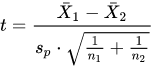

In [15]:
StandErrorDiff=s_pooled*(np.sqrt(1/11+1/9))
print("The standard error of the difference is: "+str(StandErrorDiff))

The standard error of the difference is: 2366.3596652883343


In [16]:
print("The difference in means is:" + str(np.mean(Nonsmokers)-np.mean(Smokers)))

The difference in means is:-5708.848484848488


In [17]:
# The t test statistic
-5708.849/(2366.360)

-2.412502324244832

# - Compare the test statistic with a critical value from a statistics table (for a critical value method) or find the p-value from the test statistic 

To find the critical t value using a t table, find the t-value at dof=18 and at 1-alpha/2 = 0.975 = 2.101

Go to the t-table and find this critical value.

In [18]:
# check this critical value using python
Critical_t=stats.t.ppf(0.975,18)
print(Critical_t)

2.10092204024096


What is the p-value found from our test statistic?

To find the p-value, we can work backwards from a t-table at the t test statistic (absolute value) that we calculated from the data.

Find the t-value using dof=18 of 2.4125 on the t-table and find the area under the curve.  This would be betweeen p= 0.025 and p=0.01 (closer to 0.01).  Since this is a two-sided test, we need to double this to p-value = 0.02 to 0.05. The exact p-value is 

In [19]:
# check with python
stats.t.cdf(-2.4125,18)

0.01336578935158508

In [20]:
2*(stats.t.cdf(-2.4125,18))

0.02673157870317016

# - Make a conclusion based on the statistics test.  The choice is to reject the null hypothesis of not.

What is our conclusion based on the critical value method?


If the absolute value of our test statistic is greater than the critical t, then we know that the difference in means is statistically significant at alpha = 0.05.

Is 2.4125 as extreme or more extreme than the critical value of 2.101? We are in the rejection region so reject the null hypothesis.  

What is our conclusion based on the p-value method?

The p-value=0.027 is less than p=0.05 (our alpha level), so we are confident to reject the null hypothesis (null hypothesis = that there is no true differnce in the means of our samples or that the difference means of the samples = 0).  We therefor accept the alternative hypotheiss and state that there is a significant different in the means.  

# 95% Confidence Interval of the Difference in Means

equation for 95% CI: 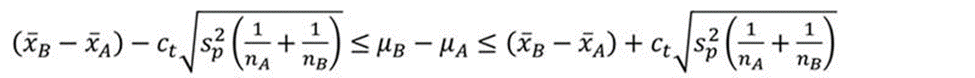

In [21]:
LB=(np.mean(Nonsmokers)-np.mean(Smokers)) - Critical_t*s_pooled* (np.sqrt(1/11 + 1/9))
UB=(np.mean(Nonsmokers)-np.mean(Smokers)) + Critical_t*s_pooled* (np.sqrt(1/11 + 1/9))
print(LB)
print(UB)

-10680.38566078997
-737.3113089070048


Interpretation:  The 95%CI of difference in means is = (-10680.386 to-737.31).  The confidence interval for meanA-meanB (the difference in sample means) does not cross 0 and has a negative range of values.  If the CI crossed 0 then no difference would be within the plausible values of the true diffenece in means and it would be a non-significnat finding.  Our results show that mean A is smaller than mean B, and that the difference in means is statistically significant at the 95% confidence level, with p=0.027.  

Note:  It is of note that if 2 separate CIs, each from one sample, do overlap, then you could still have a significant t-test stating that the differnece in the means is significantly different (rare but possible), but if the CIs of the samples do not overlap then the difference in means will be significant.  In general, you want to test the difference in means between the samples.  

# Using python to check

Now let's run the statistical test using the student's t-test for independent samples. We will look at using the Python library SciPy (that we imported as stats) and statsmodels (that we imported as sm).  We will run the hypothesis test and look at the 95% CI of the difference in means between the samples.  

In [22]:
stats.ttest_ind(Nonsmokers,Smokers,equal_var=True)

Ttest_indResult(statistic=-2.41250244778529, pvalue=0.02673144417952557)

In [23]:
sm.stats.ttest_ind(Nonsmokers,Smokers,usevar='pooled')

(-2.41250244778529, 0.02673144417952557, 18.0)

In [24]:
cm=sm.stats.CompareMeans(sm.stats.DescrStatsW(Nonsmokers),sm.stats.DescrStatsW(Smokers))
print(cm.tconfint_diff(usevar='pooled'))

(-10680.385660789972, -737.3113089070039)
